# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read dataset

In [2]:
dfs = pd.read_excel('example.xlsx')

# analyse data

In [3]:
print("\nnumber of samples : " , dfs.count().max())
print(dfs.columns)


number of samples :  9913
Index(['Unnamed: 0', 'Reference', 'Analysis', 'Design', 'Coding', 'github',
       'Testing', 'Results', 'Report', 'Presentation', 'Proposal',
       'NumOfMeetings', 'Evaluation'],
      dtype='object')


In [4]:
dfs.head()

,Unnamed: 0,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,0,44,50,1,57,67,81,43,60,97,67,90,one
1,1,22,38,2,24,45,9,65,17,8,5,30,three
2,2,17,35,0,50,59,19,31,12,27,12,10,one
3,3,17,98,61,9,8,4,0,21,63,63,10,one
4,4,8,9,10,7,59,42,23,6,49,83,80,two


In [5]:
print("The number of samples in the class 'red' : " , dfs['Evaluation'][dfs['Evaluation'] == 'one'].count())
print("The number of samples in the class 'orange' : " , dfs['Evaluation'][dfs['Evaluation'] == 'two'].count())
print("The number of samples in the class 'green' : " , dfs['Evaluation'][dfs['Evaluation'] == 'three'].count())

The number of samples in the class 'red' :  3371
The number of samples in the class 'orange' :  3321
The number of samples in the class 'green' :  3221


# preprocessing

In [6]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)

In [7]:
dfs.head()

,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,44,50,1,57,67,81,43,60,97,67,90,one
1,22,38,2,24,45,9,65,17,8,5,30,three
2,17,35,0,50,59,19,31,12,27,12,10,one
3,17,98,61,9,8,4,0,21,63,63,10,one
4,8,9,10,7,59,42,23,6,49,83,80,two


In [8]:
X = dfs.drop(['Evaluation'], axis=1)
y = dfs['Evaluation']

#### Data Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=42)
X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)
# X_train, X_test, X_valid = X_train.reset_index(drop=True), X_test.reset_index(drop=True), X_valid.reset_index(drop=True)
# y_train, y_test, y_valid = y_train.reset_index(drop=True), y_test.reset_index(drop=True), y_valid.reset_index(drop=True)

# building and training model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn1.fit(X_train , y_train)
print("Test score: {:.2f}".format(knn1.score(X_test , y_test)))


Test score: 0.34


# Validation

البحث عن قيم الباراميترات الأفضل للشبكة العصبونية باستخدام طريقة GridSearch .

و استخدام طريقة التقييم Fold cross validation-5 لتقسيم البيانات

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 10 , 100], 'weights': ['uniform', 'distance'], 'metric': ['euclidean' , 'cosine' , 'manhattan' , 'minkowski']}

clf = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= param_grid , cv=3, scoring='accuracy', verbose=3)

In [12]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.334 total time=   0.3s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.342 total time=   0.3s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.330 total time=   0.3s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.334 total time=   0.2s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.342 total time=   0.2s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.330 total time=   0.2s
[CV 1/3] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.335 total time=   0.5s
[CV 2/3] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.328 total time=   0.4s
[CV 3/3] END metric=euclidean, n_neighbors=10, weights=uniform;, score=0.316 total time=   0.6s
[CV 1/3] END metric=euclidean, n_neighbors=10, weights=distance;, score=0.342 

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': [1, 10, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

عرض قيم الباراميترات الأفضل وعرض دقتها وفقا لعملية البحث ثم اعادة تدريب الشبكة على هذه القيم و عرض دقتها النهائية وعرض مخطط دقتها في كل طور.

In [13]:
print("Best of Hyper Parameter :" , clf.best_params_, "\nScore : " , clf.best_score_)

Best of Hyper Parameter : {'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'uniform'} 
Score :  0.3467826410986003


In [14]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean').fit(X_train, y_train)
print("Test score: {:.2f}".format(knn2.score(X_test, y_test)))

Test score: 0.34


تقييم النموذج الأفضل وفقا للمقاييس: ,matrix confusion
.classification report

In [15]:
from sklearn.metrics import confusion_matrix

ypred = knn2.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("confusion_matrix(ytest, ypred): \n", cm)

confusion_matrix(ytest, ypred): 
 [[221 232 208]
 [209 220 216]
 [234 218 225]]


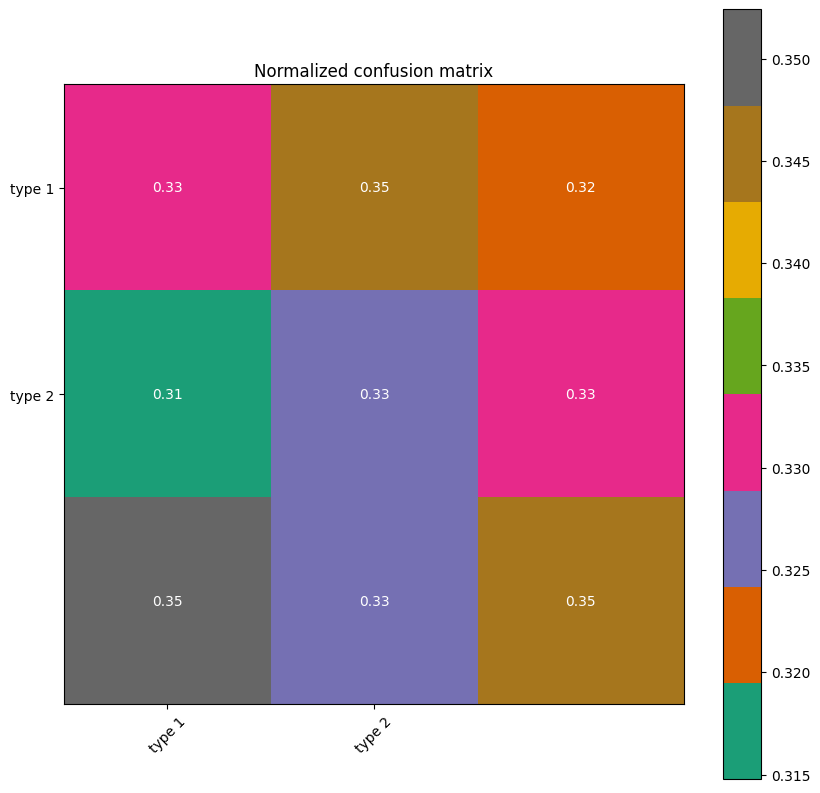

In [16]:
classes = ['type 1', 'type 2']
cm = cm/np.sum(cm,axis=0)
tick_marks = np.arange(2)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes);

classification report

In [17]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, ypred))

Classification Report:
               precision    recall  f1-score   support

         one       0.33      0.33      0.33       661
       three       0.33      0.34      0.33       645
         two       0.35      0.33      0.34       677

    accuracy                           0.34      1983
   macro avg       0.34      0.34      0.34      1983
weighted avg       0.34      0.34      0.34      1983

